# Статистика, DS-поток
## Задание SP.3

Задача 1: Дов. интервалы для выборки из равномерного распределения..
▫️ Наличие решения. (60.0)
▫️ Нет никаких формул для интервалов. Комм. Не выписаны явно формулы для интервалов, они есть только в коде. (-15.0)
Баллы: 45.0 / 60.0

Задача 2: Дов. интервалы для параметра сдвига в норм. модели в случае неизвестной дисперсии..
▫️ Наличие решения. (80.0)
▫️ Слишком большое ограничение ylim. Комм. Из-за большого ограничение ylim не видно различие в поведении точного/ас. интервала на маленьких размерах выборки. (-5.0)
▫️ Нет значений оценки / Нет оценки X.mean() на графике. Комм. График теряет в наглядности. Стоит использовать fill_between для интервалов. (-5.0)
▫️ Нет истинного значения параметра. Комм. Истинное значение параметра важно для сравнения. (-3.0)
▫️ Нет точек выборки. Комм. Визуализация точек выборки важна для наглядности. (-3.0)
Баллы: 64.0 / 80.0

Задача 3: Дов. область для параметров нормального распр..
▫️ Наличие решения. (60.0)
▫️ На самом деле, доверительный интервал для a не зависит от sigma (надо было для этого sigma^2 заменить на S^2), и область получается прямоугольником. (-3.0)
▫️ Не исследована доля покрытия параметра θ. (-10.0)
▫️ Нет объяснений природы явлений / Нет ответов на вопрос "почему?". Комм. Например, читатель не найдёт ответ на вопрос «Почему сокращается доверительная область с увеличением размера выборки?». (-5.0)
Баллы: 42.0 / 60.0

Сумма: 151 / 200.0

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

sns.set(font_scale=1.5, palette='Set2')

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением (см. задание ST.3). 

Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя функцию из задания SP.2. Нужно нанести на график точки выборки.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

Статистика по выборке достаточно большого размера приближенно имеет распределение:

$2\overline{X} \approx \mathcal{N}(\theta, \frac{\theta ^ 2}{3})$

$n (X_{(n)} - \theta) \approx F(x) = e^{\frac{x}{\theta}}$

In [3]:
theta = 5
N = 100 # размер выборки

# Генерируем выборку
sample = sps.uniform(0, theta).rvs(size=N)

n_range = np.arange(100) + 1
means = sample.cumsum() / n_range

X_n = np.maximum.accumulate(sample)

# считаем квантиль и дисперсию нормального распределения (оценка средним)
alpha = 0.95
z_alpha_2 = sps.norm.ppf((1 + alpha) / 2)
sigma = 2 * means / np.sqrt(3)

# считаем квантили F(x) (оценка максимумом)
g_minus = X_n * (np.log((1 - alpha) / 2))
g_plus = X_n * (np.log((1 + alpha) / 2))



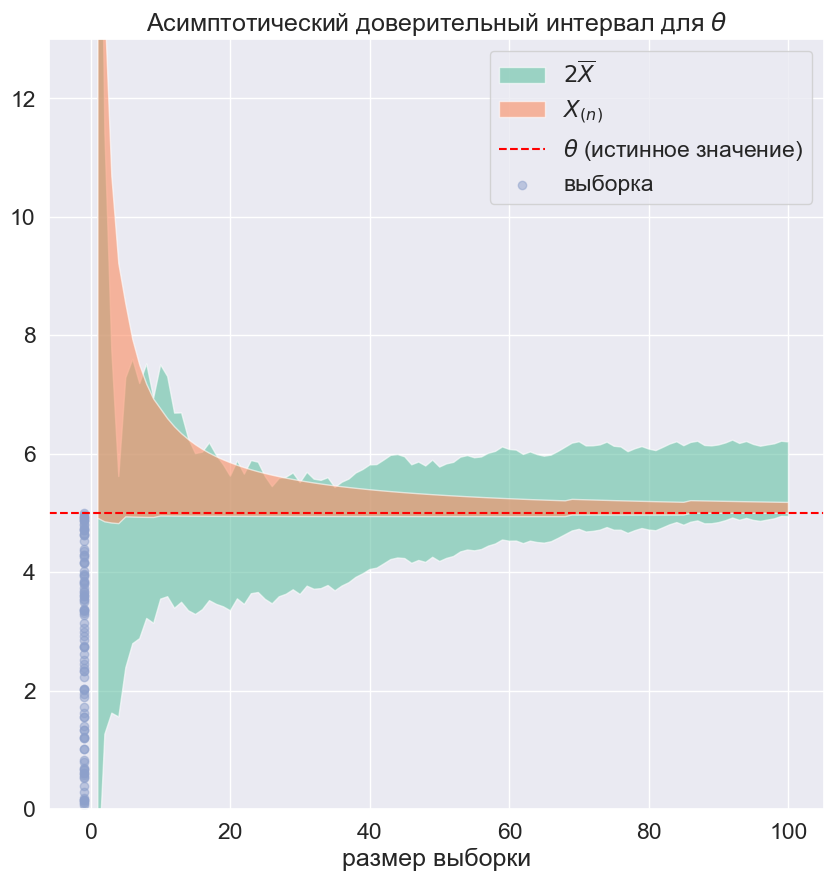

In [5]:
# Визуализация доверительных интервалов 
plt.figure(figsize=(10, 10))

# доверительный интервал для оценки средним
plt.fill_between(n_range, 2 * means - z_alpha_2 * sigma / np.sqrt(n_range), 2 * means + z_alpha_2 * sigma / np.sqrt(n_range), alpha=0.6, label='$2\\overline{X}$')

# доверительный интервал для оценки максимумом
plt.fill_between(n_range, X_n - g_minus / n_range, X_n - g_plus / n_range, alpha=0.6, label='$X_{(n)}$')

# Истинное значение параметра тета
plt.axhline(y=theta, color='red', linestyle='--', label='$\\theta$ (истинное значение)')

# выборка
plt.scatter(np.zeros(100) - 1, sample, alpha=0.5, label='выборка')
plt.xlabel('размер выборки')
plt.title('Асимптотический доверительный интервал для $\\theta$')
plt.legend()
plt.ylim(0, 13)
plt.show()

Сравните два исследуемых интервала по величине доли покрытия истинного значения $\theta$. Посмотрите примеры в ноутбуке с семинара.

In [6]:
n_range = np.arange(100) + 1
means = sample.cumsum() / n_range

X_n = np.maximum.accumulate(sample)

# считаем квантиль и дисперсию нормального распределения (оценка средним)
alpha = 0.95
z_alpha_2 = sps.norm.ppf((1 + alpha) / 2)
sigma = 2 * means / np.sqrt(3 * n_range)

# считаем квантили F(x) (оценка максимумом)
g_minus = X_n * (np.log((1 - alpha) / 2))
g_plus = X_n * (np.log((1 + alpha) / 2))

In [9]:
def get_means_confint(sample, alpha=0.95, axis=-1):
    n = sample.shape[axis]
    mean = sample.mean(axis=axis)
    sigma = 2 * mean / np.sqrt(3 * n)
    z_alpha_2 = sps.norm.ppf((1 + alpha) / 2)

    return 2 * mean - z_alpha_2 * sigma, 2 * mean + z_alpha_2 * sigma


def get_X_n_confint(sample, alpha=0.95, axis=-1):
    n = sample.shape[axis]
    X_n = sample.max(axis=axis)
    g_minus = X_n * (np.log((1 - 0.95) / 2))
    g_plus = X_n * (np.log((1 + 0.95) / 2))

    return X_n - g_plus / n, X_n - g_minus / n


def get_coverage_rate(ci_builder, sample, theta_space, alpha=0.95):
    '''
    Вычисляет долю покрытия параметра доверительным интервалом

    :param ci_builder: Функция, по выборке строящая доверительные интервалы,
    должна возвращать пару массивов: левые и правые границы доверительных
    интервалов
    :type ci_builder: numpy.array -> (numpy.array, numpy.array)

    :param sample: Выборка, для которой будут построены доверительные интервалы
    :type sample: numpy.array

    :param theta_space: Сетка из значений параметра распределения Бернулли
    :type theta_space: numpy.array

    :param alpha: Уровень доверия для построения ДИ
    :type alpha: float
    '''
    left, right = ci_builder(sample, alpha, axis=-1)
    return np.mean(
        (left <= theta_space.reshape(-1, 1)) & (theta_space.reshape(-1, 1) <= right),
        axis=-1,
    )

In [10]:
def run_few_experiments(
        sample_func,
        methods,
        sample_size=100,
        num_exps=1000,
        theta_gran=100,
        alpha=0.95,
        thetas=None):

    theta_space = np.linspace(0, 1, theta_gran)
    samples = sample_func.rvs(
        size=(len(theta_space), num_exps, sample_size)
    )
    return np.array([
        get_coverage_rate(method, samples, theta_space, alpha)
        for method in methods
    ]) if thetas is None else np.array([
        get_coverage_rate(methods[i], samples, thetas[i], alpha)
        for i in range(len(methods))
    ])

def run_many_experiments(
        sample_func,
        methods,
        sample_size=100,
        num_exps=1_000_000,
        small_num_exps=1_000,
        theta_gran=100,
        alpha=0.95,
        thetas=None):

    results = np.zeros((2, theta_gran))
    launches = num_exps // small_num_exps
    for _ in tqdm(range(launches)):
        results += run_few_experiments(sample_func, methods, sample_size,
                                      small_num_exps, theta_gran, alpha, thetas)
    return results / launches

In [11]:
THETA_GRAN = 1000  # Размер сетки параметра
NUM_EXPS = 10_000  # Число экспериментов всего
NUM_SMALL_EXPS = 100  # Число экспериментов в одном запуске
SAMPLE_SIZE = 100  # Размер выборки
ALPHA = 0.95  # Уровень доверия
METHODS = [get_means_confint, get_X_n_confint]  # Методы построения ДИ
NAMES = ['$2\\overline{X}$', '$X_{(n)}$']  # Названия методов

theta_space = np.linspace(0, 1, THETA_GRAN)
sample_func = sps.uniform(np.zeros((np.prod(theta_space.shape), 1, 1)), theta_space.reshape(-1, 1, 1))

results = run_many_experiments(sample_func, METHODS, SAMPLE_SIZE, NUM_EXPS, NUM_SMALL_EXPS, THETA_GRAN, ALPHA)

100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


In [16]:
def plot_results(results, names, thetas=None):
    '''
    Функция для отрисовки графиков
    '''
    _, (ax1, ax2) = plt.subplots(figsize=(20, 11), nrows=2, ncols=1)
    i = 0
    for name, result in zip(names, results):
        theta_space = np.linspace(0, 1, THETA_GRAN) if thetas is None else thetas[i]
        ax1.plot(theta_space, result, label=name, lw=2)
        i += 1

    ax1.hlines(0.95, 0, 1, color='gray', alpha=0.3, lw=5)
    ax1.legend()
    ax1.set_ylabel("Доля покрытия")
    ax1.set_ylim(0.94, 0.955)
    ax1.set_title("Доля покрытия параметра, Размер выборки: {}".format(SAMPLE_SIZE))

    ax2.plot(theta_space, results[1, :] - results[0, :], lw=2)
    # ax2.set_ylim(-0.1, 0.2)
    ax2.set_ylabel("Разность между долями покрытия")
    ax2.set_xlabel("Параметр $\\theta$")

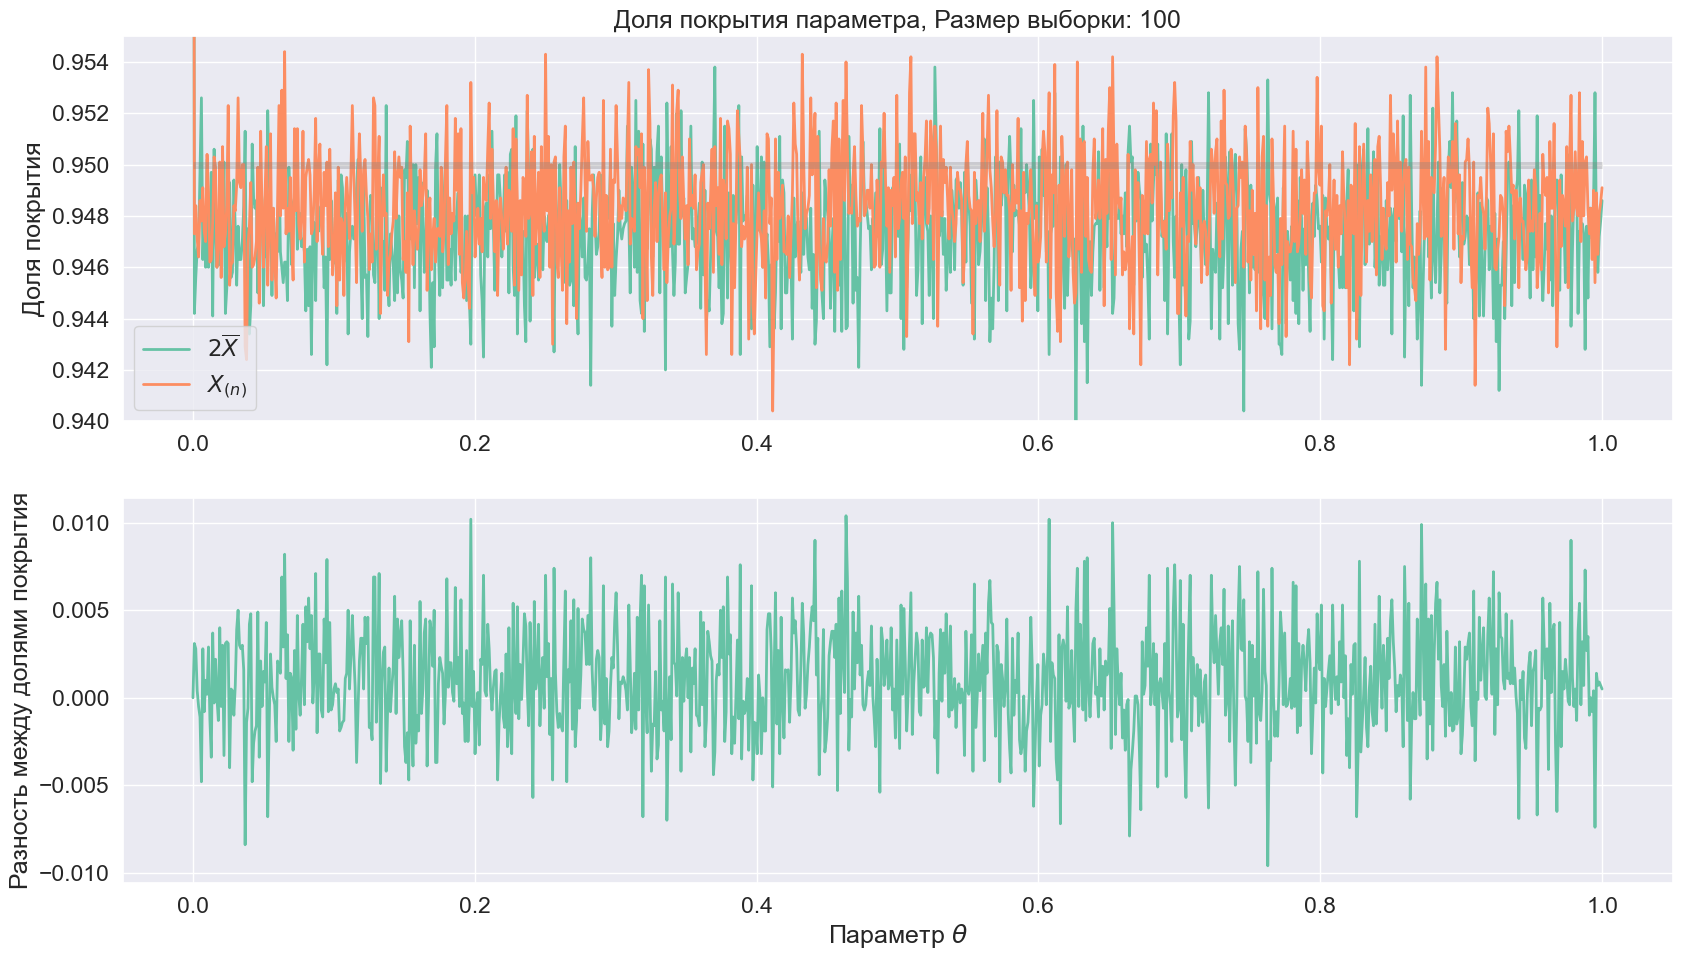

In [17]:
plot_results(results, NAMES)

**Вывод:**
1. - **Интервал Вальда** основан на среднем, и при увеличении размера выборки n его ширина постепенно уменьшается. Этот интервал использует аппроксимацию среднего нормальным распределением.
   - **Интервал на основе максимума $X_{(n)}$** более сужается по сравнению с Вальдом, так как $X_{(n)}$ — это состоятельная оценка параметра $\theta$ при больших $n$, и этот интервал использует экспоненциальную аппроксимацию.

2. Статистика на основе максимума выборки дает более узкие интервалы по сравнению со средней выборочной величиной, она точнее описывает параметр $\theta$, что видно на графике. Однако, реальное значение параметра всегда находится в самом низу интервала.

3. Доля покрытия примерно одинакова и варьируется около 95%.

__________________
## Задача 2.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $(\overline{X} \pm z_\frac{1+\alpha}{2}\frac{S}{\sqrt{n}})$

Точный доверительный интервал: $(\overline{X} \pm T_{n-1, \frac{1+\alpha}{2}}\frac{S}{\sqrt{n-1}})$

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [18]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """
    Вычисляет асимптотические доверительные интервалы для среднего значения выборки,
    используя нормальное распределение.

    Параметры:
    -----------
    sample : numpy.ndarray
        Одномерный массив наблюдений (выборка).
    alpha : float, по умолчанию 0.95
        Уровень доверия для интервала (доверительная вероятность).

    Возвращает:
    -----------
    lower_bound : numpy.ndarray
        Нижние границы доверительных интервалов для каждой подвыборки.
    upper_bound : numpy.ndarray
        Верхние границы доверительных интервалов для каждой подвыборки.

    Описание:
    ---------
    Для каждой подвыборки размера n от 1 до полного размера выборки, функция вычисляет
    доверительные интервалы на основе асимптотической нормальной аппроксимации:
    $
    \theta \pm z \cdot \frac{S}{\sqrt{n}},
    $
    где z — квантиль стандартного нормального распределения, S — выборочная дисперсия, 
    а n — размер подвыборки.
    """
    n_range = np.arange(sample.shape[0]) + 1
    # квантиль N(0, 1)
    z = sps.norm.ppf((1 + alpha) / 2)
    # выборочная дисперсия
    S = np.sqrt((sample ** 2).cumsum() / n_range - (sample.cumsum() / n_range) ** 2)
    # оценка
    theta = sample.mean()
    
    return theta - z * S / np.sqrt(n_range), theta + z * S / np.sqrt(n_range)


def calculate_confidence_intervals(sample, alpha=0.95):
    """
    Вычисляет доверительные интервалы для среднего значения выборки,
    используя распределение Стьюдента (t-распределение).

    Параметры:
    -----------
    sample : numpy.ndarray
        Одномерный массив наблюдений (выборка).
    alpha : float, по умолчанию 0.95
        Уровень доверия для интервала (доверительная вероятность).

    Возвращает:
    -----------
    lower_bound : numpy.ndarray
        Нижние границы доверительных интервалов для каждой подвыборки.
    upper_bound : numpy.ndarray
        Верхние границы доверительных интервалов для каждой подвыборки.

    Описание:
    ---------
    Для каждой подвыборки размера n от 2 до полного размера выборки, функция вычисляет
    доверительные интервалы на основе t-распределения Стьюдента:
    $
    \theta \pm g \cdot \frac{S}{\sqrt{n-1}},
    $
    где g — квантиль t-распределения с n-1 степенями свободы, S — выборочная дисперсия, 
    а n — размер подвыборки.
    """
    n_range = np.arange(sample.shape[0]) + 1
    # квантили T_{n-1}
    g = sps.t.ppf((1 + alpha) / 2, df=n_range-1)
    # выборочная дисперсия
    S = np.sqrt((sample ** 2).cumsum() / n_range - (sample.cumsum() / n_range) ** 2)
    # оценка
    theta = sample.mean()

    return theta - g * S / np.sqrt(n_range - 1), theta + g * S / np.sqrt(n_range - 1)

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

In [19]:
# генерируем выборку
sample = sps.norm(10, 3).rvs(size=30)

# считаем интервалы
aci_low, aci_high = calculate_asymptotic_confidence_intervals(sample)
ci_low, ci_high = calculate_confidence_intervals(sample)

n_range = np.arange(sample.shape[0]) + 1

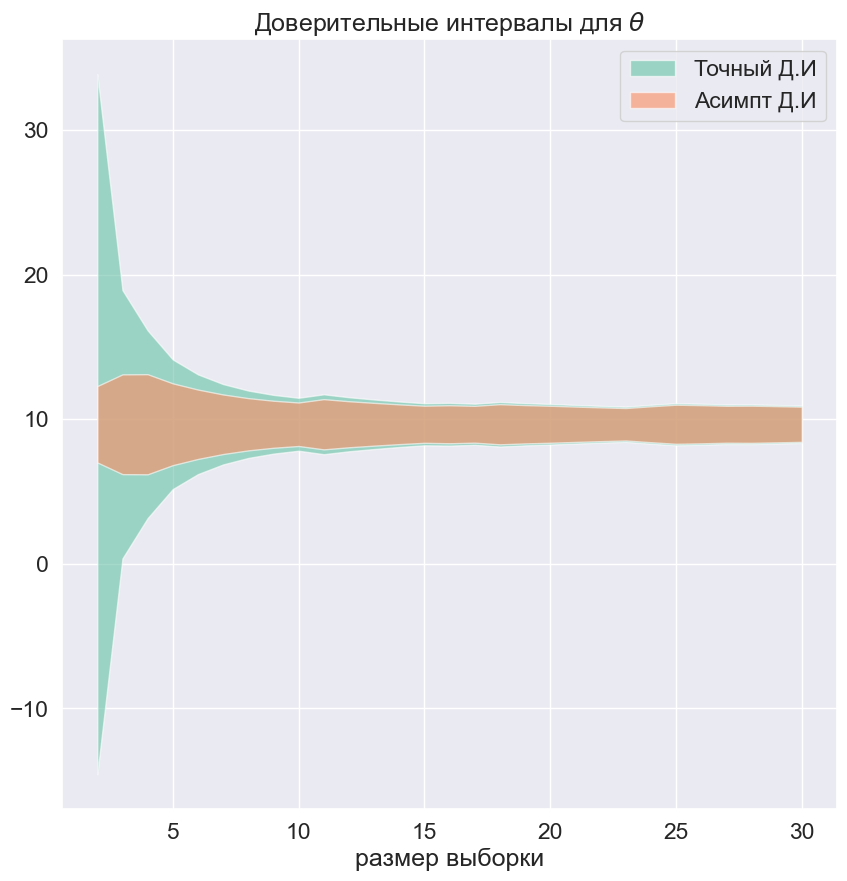

In [20]:
plt.figure(figsize=(10, 10))
plt.fill_between(n_range[1:], ci_low[1:], ci_high[1:], alpha=0.6, label='Точный Д.И')
plt.fill_between(n_range[1:], aci_low[1:], aci_high[1:], alpha=0.6, label='Асимпт Д.И')
plt.xlabel('размер выборки')
plt.title('Доверительные интервалы для $\\theta$')
plt.legend()
plt.show()

При малых n точный интервал шире асимптотического, так как t-распределение более "растянуто" по сравнению с нормальным, имеет более тяжелые хвосты. Это происходит из-за необходимости учитывать большую вариативность при малых объемах выборок.
При увеличении размера выборки разница между интервалами уменьшается, и при достаточно большом n они практически совпадают. Это связано с тем, что t-распределение приближается к нормальному распределению при больших степенях свободы.

Сравните также эти интервалы по величине доли покрытия истинного значения параметра сдвига.

In [21]:
def get_shift_aci_confint(sample, alpha=0.95, axis=-1):
    n = sample.shape[axis]
    # квантиль N(0, 1)
    z = sps.norm.ppf((1 + alpha) / 2)
    # выборочная дисперсия
    S = np.sqrt((sample ** 2).mean(axis=axis) - (sample.mean(axis=axis)) ** 2)
    # оценка
    theta = sample.mean(axis=axis)

    return theta - z * S /np.sqrt(n), theta + z * S / np.sqrt(n)


def get_shift_ci_confint(sample, alpha=0.95, axis=-1):
    n = sample.shape[axis]
    # квантили T_{n-1}
    g = sps.t.ppf((1 + alpha) / 2, df=n-1)
    # выборочная дисперсия
    S = np.sqrt((sample ** 2).mean(axis=axis) - (sample.mean(axis=axis)) ** 2)
    # оценка
    theta = sample.mean(axis=axis)

    return theta - g * S / np.sqrt(n - 1), theta + g * S / np.sqrt(n - 1)

100%|██████████| 100/100 [00:31<00:00,  3.18it/s]


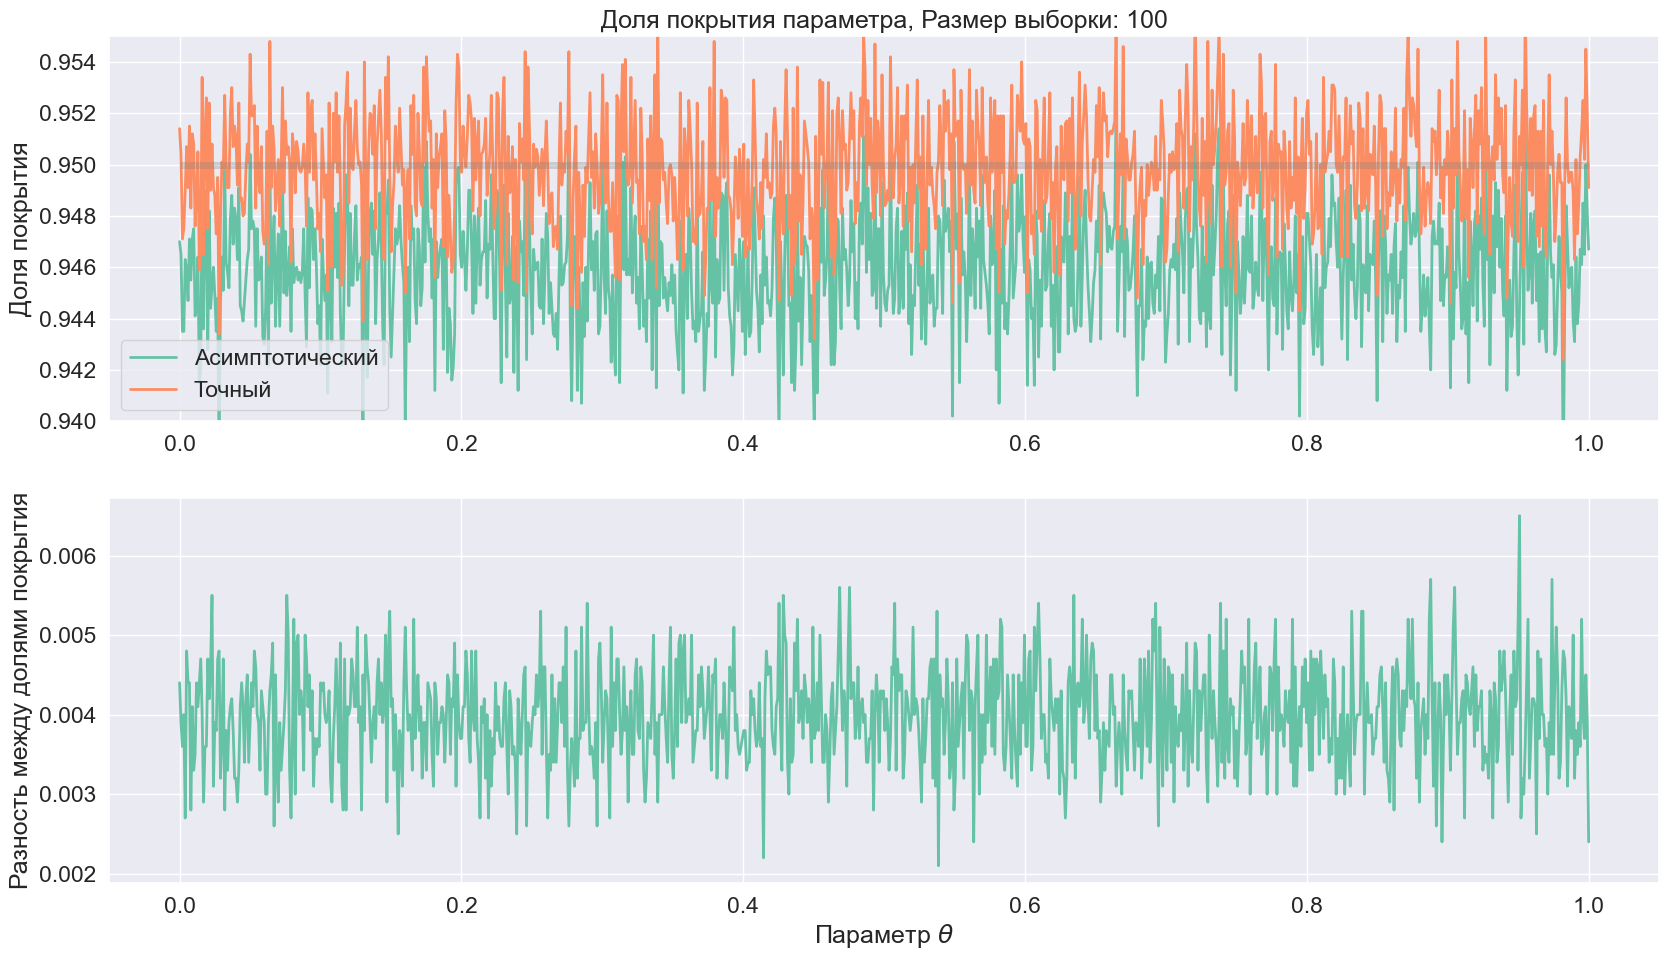

In [23]:
THETA_GRAN = 1000  # Размер сетки параметра
NUM_EXPS = 10_000  # Число экспериментов всего
NUM_SMALL_EXPS = 100  # Число экспериментов в одном запуске
SAMPLE_SIZE = 100  # Размер выборки
ALPHA = 0.95  # Уровень доверия
METHODS = [get_shift_aci_confint, get_shift_ci_confint]  # Методы построения ДИ
NAMES = ['Асимптотический', 'Точный']  # Названия методов

theta_space = np.linspace(0, 1, THETA_GRAN)
sample_func = sps.norm(theta_space.reshape(-1, 1, 1), np.ones((np.prod(theta_space.shape), 1, 1)))

results = run_many_experiments(sample_func, METHODS, SAMPLE_SIZE, NUM_EXPS, NUM_SMALL_EXPS, THETA_GRAN, ALPHA)
plot_results(results, NAMES)

**Вывод:** 
Видим, что у точного д.и доля покрытия всегда превышает асимптотическую. У обоих методов доля покрытия близка к 95%. Это объясняется тем, что а.д.и дает заявленный уровень доверия только при достаточно больших n

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [43]:
df = pd.read_csv('wine.data')
df = df[df.iloc[:, 0] == 1].iloc[:, [4, 8, 9, 11]]
df.head()
df.size

232

In [42]:
ci = []
aci = []

for i in range(4):

    aci_low, aci_high = calculate_asymptotic_confidence_intervals(df.iloc[:, i])
    ci_low, ci_high = calculate_confidence_intervals(df.iloc[:, i])

    aci.append((aci_low.iloc[-1], aci_high.iloc[-1]))
    ci.append((ci_low.iloc[-1], ci_high.iloc[-1]))


res = pd.DataFrame({'confidence_intervals' : ci, 'asymptotic_confidence_intervals' : aci})
res

,confidence_intervals,asymptotic_confidence_intervals
0,"(16.388589773823778, 17.735548157210705)","(16.408591417683876, 17.715546513350606)"
1,"(0.27159636136412074, 0.3087484662220861)","(0.272148051141019, 0.3081967764451879)"
2,"(1.7841460778956224, 2.0010263358974805)","(1.7873666389273086, 1.9978057748657945)"
3,"(1.0315284450768345, 1.093299141130062)","(1.032445708355853, 1.0923818778510437)"


**Вывод:**
В данном случае д.и и а.д.и практически не отличаются, так размер выборки уже достаточно большой - 232.

__________________
## Задача 3. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

#### 1. Оценки параметров $a$ и $\sigma^2$

1. **Оценка для $a$**:
   $
   \hat{a} = \frac{1}{n} \sum_{i=1}^{n} X_i.
   $
   По ЦПТ выборочное среднее $\hat{a}$ имеет нормальное распределение:
   $
   \hat{a} \sim \mathcal{N}\left(a, \frac{\sigma^2}{n}\right).
   $

2. **Оценка для $\sigma^2$**:
   $
   \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \hat{a})^2.
   $
   Выборочная дисперсия связана с истинной дисперсией через распределение $\chi^2$. Известно, что:
   $
   \frac{(n-1) \hat{\sigma}^2}{\sigma^2} \sim \chi^2(n-1).
   $

#### 2. Построение доверительных интервалов для каждого параметра

##### Доверительный интервал для $a$

$
\hat{a} \pm z_{\alpha/2} \cdot \frac{\hat{\sigma}}{\sqrt{n}},
$
где $ z_{\alpha/2} $ — квантиль стандартного нормального распределения.

##### Доверительный интервал для $\sigma^2$

$
\left[ \frac{(n-1) \hat{\sigma}^2}{\chi^2_{1-\alpha/2}}, \frac{(n-1) \hat{\sigma}^2}{\chi^2_{\alpha/2}} \right],
$
где $\chi^2_{1-\alpha/2}$ и $\chi^2_{\alpha/2}$ — квантили распределения $\chi^2$ с $n-1$ степенями свободы.

#### 3. Построение совместной доверительной области

Для построения совместной доверительной области для $(a, \sigma^2)$ можно использовать ковариационную матрицу оценок. В нашем случае можно считать, что оценки параметров $a$ и $\sigma^2$ независимы (при большом $n$ по Теореме 1 из лекции).

Ковариационная матрица для двух оценок $a$ и $\sigma^2$ имеет вид:

$
\text{Cov}(\hat{a}, \hat{\sigma}^2) = \begin{pmatrix}
\frac{\sigma^2}{n} & 0 \\
0 & \frac{2\sigma^4}{n-1}
\end{pmatrix}.
$

- $\frac{\sigma^2}{n}$ — дисперсия оценки $\hat{a}$,
- $\frac{2\sigma^4}{n-1}$ — дисперсия оценки $\hat{\sigma}^2$.

#### 4. Построение эллипса для доверительной области

Совместная доверительная область имеет форму эллипса, который строится на основе ковариационной матрицы. Собственные значения ковариационной матрицы дают нам длины главных осей эллипса, а собственные векторы — их ориентацию.

- **Ширина эллипса**: Пропорциональна стандартному отклонению $\hat{a}$ и зависит от $\frac{\sigma^2}{n}$.
- **Высота эллипса**: Пропорциональна стандартному отклонению $\hat{\sigma}^2$ и зависит от $\frac{2\sigma^4}{n-1}$.

Главные оси эллипса задаются через собственные значения ковариационной матрицы:
$
\lambda_1 = \sqrt{\frac{\sigma^2}{n}}, \quad \lambda_2 = \sqrt{\frac{2\sigma^4}{n-1}}.
$

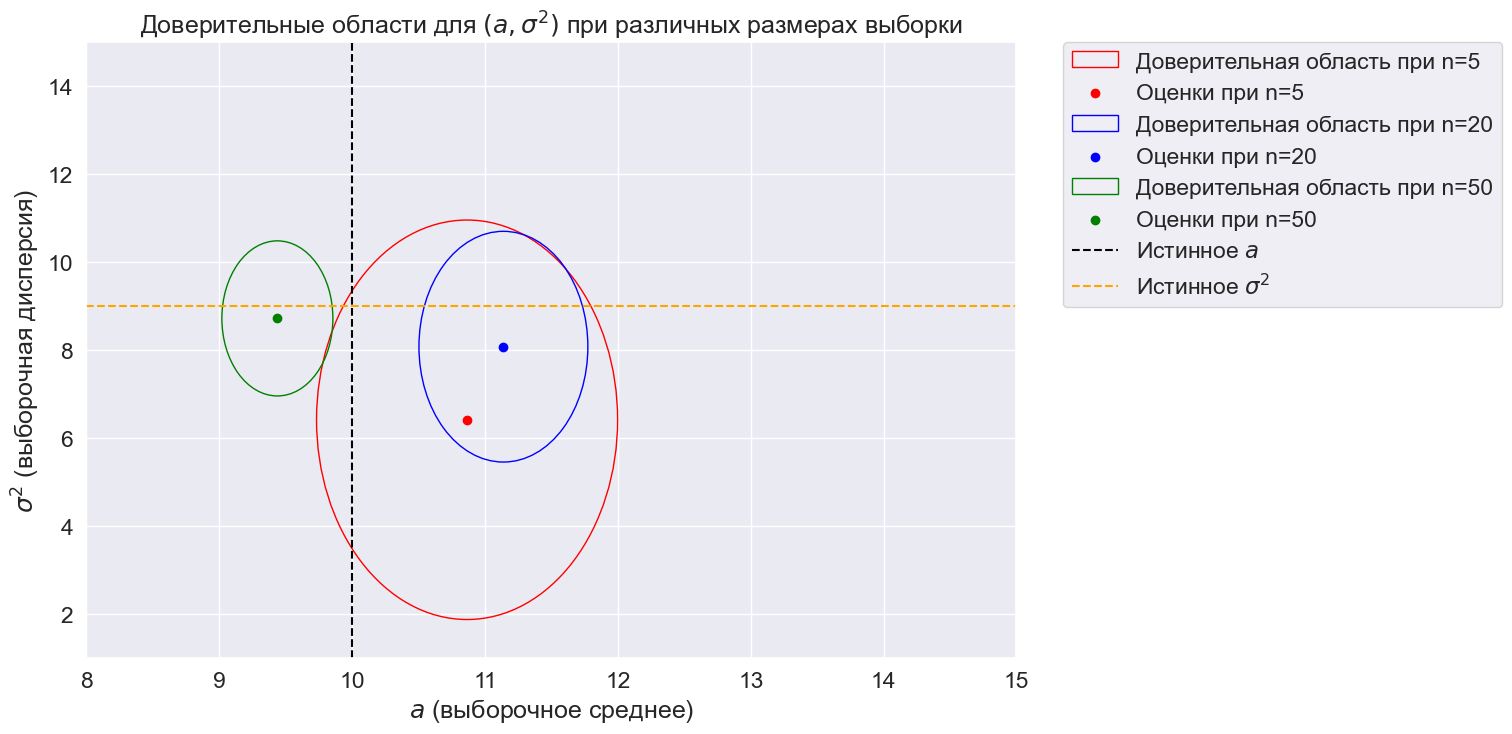

In [55]:
from matplotlib.patches import Ellipse

# Функция для вычисления и визуализации доверительной области
def plot_confidence_ellipse(sample, ax, n, color, label):
    # Оценки параметров
    a_hat = np.mean(sample)
    sigma2_hat = np.var(sample, ddof=1)
    
    # Ковариационная матрица для оценок
    cov_matrix = np.array([[sigma2_hat/n, 0], [0, 2 * sigma2_hat**2 / (n - 1)]])
    
    # Находим собственные значения и собственные вектора ковариационной матрицы
    lambda_, v = np.linalg.eig(cov_matrix)
    lambda_ = np.sqrt(lambda_)
    
    # Построение эллипса для доверительной области
    ell = Ellipse(xy=(a_hat, sigma2_hat), 
                  width=lambda_[0]*2, height=lambda_[1]*2, 
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor=color, facecolor='none', label=label)
    
    # Добавляем эллипс на график
    ax.add_patch(ell)
    ax.scatter(a_hat, sigma2_hat, label=f'Оценки при n={n}', color=color)

# Задаем различные размеры выборки и цвета
sample_sizes = [5, 20, 50]
colors = ['red', 'blue', 'green']
true_mean = 10
true_std = 3

# Увеличиваем ширину фигуры
fig, ax = plt.subplots(figsize=(12, 8))

# Генерация выборок и визуализация доверительных областей для каждого размера выборки
for n, color in zip(sample_sizes, colors):
    sample = sps.norm(true_mean, true_std).rvs(size=n)
    plot_confidence_ellipse(sample, ax, n, color, f'Доверительная область при n={n}')

# Добавляем линии для истинных значений параметров
ax.axvline(true_mean, color='black', linestyle='--', label='Истинное $a$')
ax.axhline(true_std**2, color='orange', linestyle='--', label='Истинное $\sigma^2$')

# Настройки графика
plt.xlabel('$a$ (выборочное среднее)')
plt.ylabel('$\sigma^2$ (выборочная дисперсия)')
plt.title('Доверительные области для $(a, \sigma^2)$ при различных размерах выборки')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)

plt.xlim([8, 15]) 
plt.ylim([1, 15])  

plt.show()


Исследуйте построенную доверительную область по величине доли покрытия параметра $\theta$.

**Вывод:**
Доверительная область представлена в виде эллипса, где длина и ориентация осей определяются ковариационной матрицей.